## Question 3

a) The equation for a rotationally symmetric paraboloid is
\begin{equation*}
z-z_0 = a((x-x_0)^2+(y-y_0)^2).
\end{equation*}
Let's expand this:
\begin{equation*}
z = a(x^2+y^2)-2axx_0-2ayy_0+a(x_0^2+y_0^2).
\end{equation*}
To do some linear least-squares fit we want $z=$ (linear combinations of powers of $x$ and $y$), where the constants in the linear combinations are linear. That's not quite what we have (we have some $x_0^2, some $ax_0$, etc.), so let's pick some new constants $b,c,d,e$ such that
\begin{equation*}
z = b(x^2+y^2)+cx+dy+e.
\end{equation*}
This will allow us to determine $b,c,d,e$ using least-squares, because they are linear. We can also directly read off what these constants should be in terms of the old parameters:
\begin{align*}
b &=a,\\
c &=-2ax_0,\\
d &=-2ay_0,\\
e &=a(x_0^2+y_0^2)+z_0,
\end{align*}
and so,
\begin{align*}
a &=b,\\
x_0 &=-c/2b,\\
y_0 &=-d/2b,\\
z_0 &= e-\frac{1}{4b}(c^2+d^2).
\end{align*}

In [1]:
# Question 3 b)

import numpy as np 
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['figure.dpi'] = 120

data = np.loadtxt('dish_zenith.txt')
x_data = data[:,0]; y_data = data[:,1]; z_data = data[:,2]

# set up array of values
A = np.empty([len(x_data), 4])

# first column should be x**2+y**2
A[:, 0] = x_data**2 + y_data**2
# second column is just x
A[:,1] = x_data
# third column is y
A[:,2] = y_data
# fourth column is constant
A[:,3] = 1

# use svd decomposition
u,s,v=np.linalg.svd(A,0)
mfit=v.T@np.diag(1/s)@u.T@z_data
pred = A@mfit

b,c,d,e = mfit

# old parameters
a = b; x0 = -c/(2*b); y0 = -d/(2*b); z0 = e -(c**2+d**2)/(4*b)

print('The best fit parameters are:')
print('a = ', a, 'mm')
print('x0 = ', x0, 'mm')
print('y0 = ', y0, 'mm')
print('z0 = ', z0, 'mm')

The best fit parameters are:
a =  0.00016670445477399477 mm
x0 =  -1.3604886161321565 mm
y0 =  58.22147612332249 mm
z0 =  -1512.8772100375948 mm


In [4]:
# Question 3 c)

# let's estimate the noise
N = np.mean((z_data-pred)**2)

# from our estimate in the noise, we can find the error on the parameters and the model
parameter_error = np.sqrt(N*np.diag(np.linalg.inv(A.T@A)))

B = A@np.linalg.inv(A.T@A)@A.T
model_error=np.sqrt(N*np.diag(B))

print('The uncertainty on "a" is:',parameter_error[0])
print('The uncertainty on "x0" is:',parameter_error[1])
print('The uncertainty on "y0" is:',parameter_error[2])
print('The uncertainty on "z0" is:',parameter_error[3])
# focal length is 1/(4a)
f = 1/(4*a)

# using uncertainty propagation
f_err = f*(parameter_error[0]/a )

print('The focal length measured using our best fit paremeters is:',f, ',with uncertainty of:', f_err)



The uncertainty on "a" is: 6.451899757263453e-08
The uncertainty on "x0" is: 0.0001250610995127078
The uncertainty on "y0" is: 0.00011924956427610117
The uncertainty on "z0" is: 0.3120184362020165
The focal length measured using our best fit paremeters is: 1499.6599841253853 ,with uncertainty of: 0.5804077581894141


True result is 1500 mm so we are quite close (actually the value we got with our fit parameters is equal to the real value considering uncertainties). Now let's plot the paraobloid using our fit parameters to compare it to the real data.

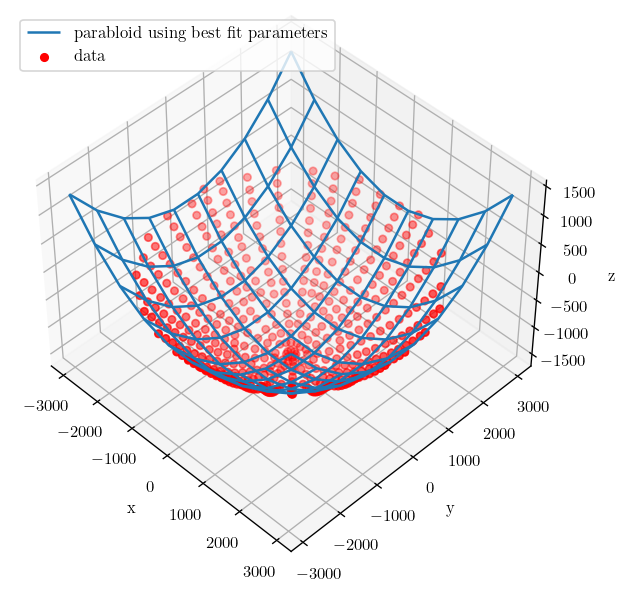

In [44]:
# plotting stuff

# equation of paraboloid is
def paraboloid(x,y):
    return a*((x-x0)**2+(y-y0)**2)+z0

xx, yy = np.meshgrid(np.linspace(np.min(x_data), np.max(x_data),10), np.linspace(np.min(y_data),np.max(y_data), 10))  
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(xx, yy, paraboloid(xx,yy), label = 'parabloid using best fit parameters')
ax.scatter(x_data, y_data, z_data, color='r', label = 'data')
ax.view_init(45, -45)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend(loc= 'upper left')
plt.show()

Doesn't look too bad!